# Module 1.4: Optimizers in Neural Networks

## Objectives
- Understand the role of optimizers in training neural networks.
- Learn about different optimization algorithms: Gradient Descent, Momentum, RMSprop, Adam.
- See mathematical formulations and intuition for each optimizer.
- Implement and compare optimizers in NumPy on a simple problem.
- Visualize convergence and learning dynamics.

## What is an Optimizer?
An optimizer is an algorithm that updates the weights of a neural network to minimize the loss function. It determines how the network learns from data during training.

The most basic optimizer is **Gradient Descent**. More advanced optimizers (Momentum, RMSprop, Adam) improve convergence speed and stability.

## Gradient Descent

The update rule for weights $w$ using gradient descent is:
$$ w \leftarrow w - \eta \frac{\partial L}{\partial w} $$
where:
- $\eta$ is the learning rate
- $L$ is the loss function
- $\frac{\partial L}{\partial w}$ is the gradient of the loss with respect to the weights

Let's visualize gradient descent on a simple quadratic function:

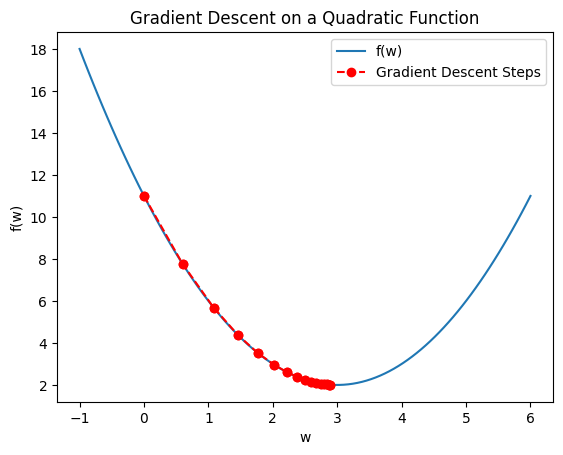

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Quadratic function: f(w) = (w-3)^2 + 2
def f(w):
    return (w-3)**2 + 2

def grad_f(w):
    return 2*(w-3)

# Gradient descent parameters
w = 0.0
lr = 0.1
history = [w]
for i in range(15):
    w = w - lr * grad_f(w)
    history.append(w)

# Plot function and steps
w_vals = np.linspace(-1, 6, 100)
plt.plot(w_vals, f(w_vals), label='f(w)')
plt.scatter(history, [f(wi) for wi in history], color='red', zorder=10)
plt.plot(history, [f(wi) for wi in history], '--o', color='red', label='Gradient Descent Steps')
plt.xlabel('w')
plt.ylabel('f(w)')
plt.title('Gradient Descent on a Quadratic Function')
plt.legend()
plt.show()

## Beyond Gradient Descent: Momentum, RMSprop, and Adam

### Momentum
Momentum helps accelerate gradient descent by adding a fraction of the previous update to the current update. This helps the optimizer move faster in the right direction and dampens oscillations.

Update rule:
$$
\begin{align*}
v_t &= \gamma v_{t-1} + \eta \nabla_w L \\
w &= w - v_t
\end{align*}
$$
where $\gamma$ is the momentum term (e.g., 0.9).

### RMSprop
RMSprop adapts the learning rate for each parameter by dividing the gradient by a running average of its recent magnitude. This helps with non-stationary objectives and different scales.

Update rule:
$$
\begin{align*}
s_t &= \beta s_{t-1} + (1-\beta) (\nabla_w L)^2 \\
w &= w - \frac{\eta}{\sqrt{s_t + \epsilon}} \nabla_w L
\end{align*}
$$
where $\beta$ is the decay rate (e.g., 0.9), $\epsilon$ is a small constant.

### Adam
Adam combines Momentum and RMSprop. It keeps running averages of both the gradients and their squares, and uses bias correction.

Update rule:
$$
\begin{align*}
m_t &= \beta_1 m_{t-1} + (1-\beta_1) \nabla_w L \\
v_t &= \beta_2 v_{t-1} + (1-\beta_2) (\nabla_w L)^2 \\
\hat{m}_t &= \frac{m_t}{1-\beta_1^t} \\
\hat{v}_t &= \frac{v_t}{1-\beta_2^t} \\
w &= w - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
\end{align*}
$$

**Summary Table:**

| Optimizer   | Key Idea                        | Pros                        | Cons                |
|-------------|----------------------------------|-----------------------------|---------------------|
| SGD         | Basic gradient step              | Simple, widely used         | Slow, oscillations  |
| Momentum    | Adds velocity                    | Faster, less oscillation    | Needs tuning        |
| RMSprop     | Adaptive learning rate           | Good for non-stationary     | May not converge    |
| Adam        | Momentum + RMSprop               | Fast, robust, popular       | Can overfit, tuning |

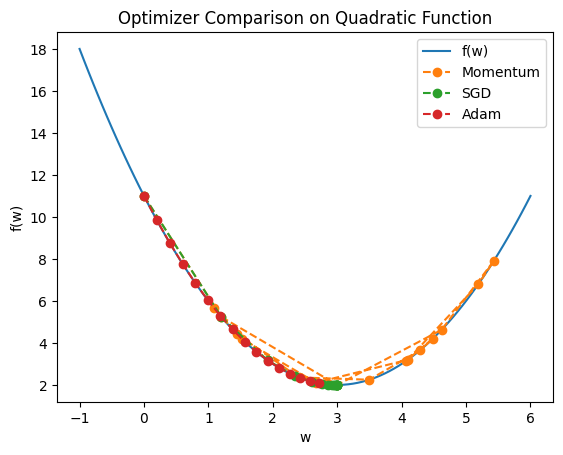

In [2]:
# Compare SGD, Momentum, and Adam on the same quadratic function
def run_optimizer(opt_name, steps=15, lr=0.2):
    w = 0.0
    ws = [w]
    v = 0.0
    m = 0.0
    s = 0.0
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8
    for t in range(1, steps+1):
        g = grad_f(w)
        if opt_name == 'SGD':
            w = w - lr * g
        elif opt_name == 'Momentum':
            v = 0.9 * v + lr * g
            w = w - v
        elif opt_name == 'Adam':
            m = beta1 * m + (1-beta1) * g
            s = beta2 * s + (1-beta2) * (g**2)
            m_hat = m / (1 - beta1**t)
            s_hat = s / (1 - beta2**t)
            w = w - lr * m_hat / (np.sqrt(s_hat) + eps)
        ws.append(w)
    return ws

steps = 15
sgd_ws = run_optimizer('SGD', steps)
momentum_ws = run_optimizer('Momentum', steps)
adam_ws = run_optimizer('Adam', steps)

plt.plot(w_vals, f(w_vals), label='f(w)')
plt.plot(momentum_ws, [f(wi) for wi in momentum_ws], '--o', label='Momentum')
plt.plot(sgd_ws, [f(wi) for wi in sgd_ws], '--o', label='SGD')
plt.plot(adam_ws, [f(wi) for wi in adam_ws], '--o', label='Adam')
plt.xlabel('w')
plt.ylabel('f(w)')
plt.title('Optimizer Comparison on Quadratic Function')
plt.legend()
plt.show()

## Conclusions and Practical Tips
- Different optimizers can have a big impact on training speed and stability.
- **SGD** is simple and works well for many problems, but can be slow and oscillate.
- **Momentum** helps accelerate convergence and smooths the path to the minimum.
- **Adam** is widely used for deep learning; it adapts the learning rate and combines the benefits of momentum and RMSprop.

**Tips:**
- Start with Adam for most problems, but try SGD or Momentum for fine-tuning or when you need more control.
- Always monitor the loss curve and try different learning rates.
- For very large datasets or models, consider using learning rate schedules or advanced optimizers.

You now have the tools to choose and implement optimizers for your neural network projects!